# 데이터

In [49]:
# 라이브러리 불러오기
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# 한글 폰트에 문제가 생겼을 때

# 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 설치한 폰트를 matplotlib에서 사용할 수 있도록 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')  # 폰트 설정

## 데이터 업로드

#### 학습 데이터 불러오기

프롬프트로 생성된 '일반 대화' 합성 데이터와 원본 데이터가 합쳐진 파일

In [2]:
# 경로를 적절히 수정해주세요.
train_data_path ="/content/drive/MyDrive/07. GoData/20. DKTC/conversations.csv"
train_data = pd.read_csv(train_data_path)

In [3]:
train_data.sample(10)

,idx,class,conversation
4740,4740,협박 대화,사모님 이 건물 이번 내진 평가에서 1등급 받은 건물입니다. 선택하시면 후회 없으실...
2451,2451,갈취 대화,어이! 이리 와봐.\n네? 무슨 일이세요?\n시끄럽게 굴지 말고 가방 내놔.\n왜 ...
2677,2677,직장 내 괴롭힘 대화,땡땡씨는 이번 워크샵 가지마\n네? 왜요?\n일두 제대로 못하는 사람이 그런데 가서...
244,244,기타 괴롭힘 대화,어이 아가씨. 좀 놀다가!\n 그래그래. 이쁘구만 우리랑 좀 놀다가.\n 아저씨들 ...
1570,1570,기타 괴롭힘 대화,늙었으면 곱게 늙으세요 나이먹고 훈계질 하지마시고\n이.고.고얀놈!!\n어른한테 무...
3874,3874,갈취 대화,그 건물 나한테 넘겨.\n 뭐?\n 나한테 말조심하는게 좋을걸? 내가 모를거라고 생...
1867,1867,협박 대화,더 이상 살고 싶지가 않아. \n여보 켁.이게 무슨.무슨 냄새야?\n여보 우리 천국...
3500,3500,기타 괴롭힘 대화,의사선생님 \n네\n저번에 다녀갔는데 대체 왜 아직도 안 낫죠?\n예 원래 2주정도...
3612,3612,갈취 대화,야 어제 만원이 비더라?\n미안. 용돈 많이 못 받아서. 그래도 받자마자 다 가지고...
1962,1962,협박 대화,알라신의 이름으로 네놈의 목을 잘라버릴 것이다.\n살려주세요.\n알라신을 믿겠다고 ...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idx           4950 non-null   int64 
 1   class         4950 non-null   object
 2   conversation  4950 non-null   object
dtypes: int64(1), object(2)
memory usage: 116.1+ KB


## Augmentation

## EDA

In [10]:
# Colab에서 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [7]:
# 클래스 별 대화 확인해보기
class_counts = train_data.groupby('class').size()
class_counts

class
갈취 대화           981
기타 괴롭힘 대화      1094
일반 대화          1000
직장 내 괴롭힘 대화     979
협박 대화           896
dtype: int64

In [6]:
# 대화(X)와 레이블(y)로 나누기
X_train = train_data['conversation']
y_train = train_data['class']

#### 길이 분포 확인

In [8]:
# 길이 분포 확인하기
print('Data Information')
print('-'*50)
print('Conversations :',X_train.shape)
print('Label :',y_train.shape)
print('Label Type:', set(y_train))
print('-'*50)
num_classes = 4
print('The number of classes : {}'.format(num_classes))
print('-'*50)
print('Max Length :{}'.format(max(len(l) for l in X_train)))
print('Average Length :{}'.format(sum(map(len, X_train))/len(X_train)))

Data Information
--------------------------------------------------
Conversations : (4950,)
Label : (4950,)
Label Type: {'갈취 대화', '직장 내 괴롭힘 대화', '협박 대화', '기타 괴롭힘 대화', '일반 대화'}
--------------------------------------------------
The number of classes : 4
--------------------------------------------------
Max Length :874
Average Length :232.0210101010101


#### 클래스 별 분포 확인

<ipython-input-21-e60d70d22ff9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[1], palette='pastel')


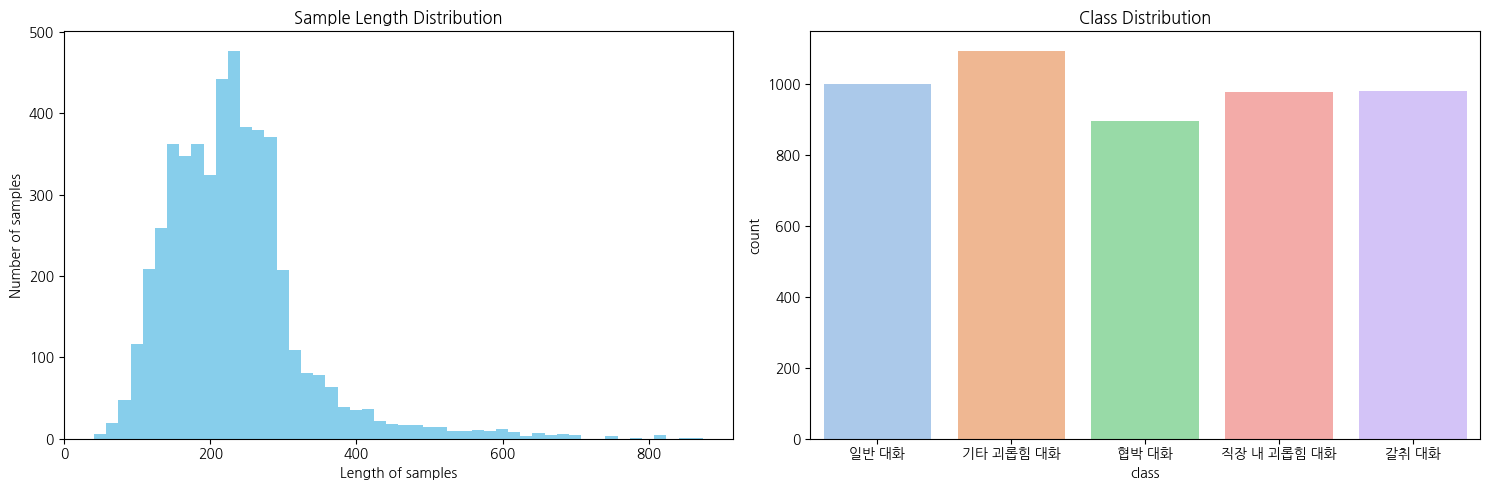

In [21]:
# 두 서브플롯 생성하기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# 샘플 길이의 히스토그램
axes[0].hist([len(s) for s in X_train], bins=50, color='skyblue')
axes[0].set_xlabel('Length of samples')
axes[0].set_ylabel('Number of samples')
axes[0].set_title('Sample Length Distribution')

# 클래스별 샘플 수 플롯
sns.countplot(x=y_train, ax=axes[1], palette='pastel')
axes[1].set_title('Class Distribution')

# 레이아웃 조정하기
plt.tight_layout()

# 플롯 표시하기
plt.show()

#### 클래스 별 길이 분포 확인

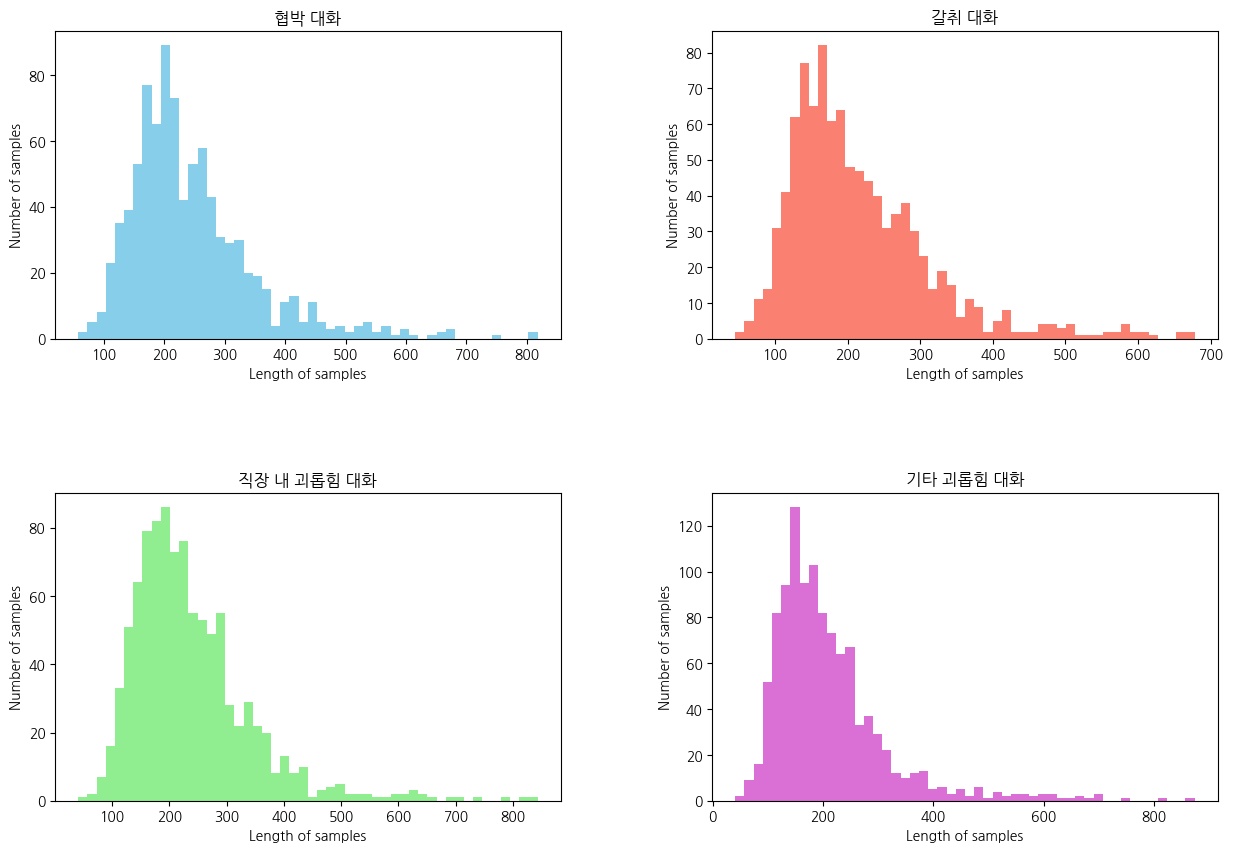

In [22]:
# 서브플롯 생성하기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 샘플 길이의 히스토그램 그리기

# 협박 대화
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']],
                bins=50, color='skyblue')
axes[0][0].set_xlabel('Length of samples')
axes[0][0].set_ylabel('Number of samples')
axes[0][0].set_title('협박 대화')

# 갈취 대화
axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']],
                bins=50, color='salmon')
axes[0][1].set_xlabel('Length of samples')
axes[0][1].set_ylabel('Number of samples')
axes[0][1].set_title('갈취 대화')

# 직장 내 괴롭힘 대화
axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']],
                bins=50, color='lightgreen')
axes[1][0].set_xlabel('Length of samples')
axes[1][0].set_ylabel('Number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

# 기타 괴롭힘 대화
axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']],
                bins=50, color='orchid')
axes[1][1].set_xlabel('Length of samples')
axes[1][1].set_ylabel('Number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

#### 화자 별 특징 분석

In [52]:
# 불용어 리스트 불러오기

# 경로를 적절히 수정해주세요.
stopwords_path = "/content/drive/MyDrive/07. GoData/20. DKTC/ko_stopwords.txt"
with open(stopwords_path, 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

In [35]:
# A와 B의 대화를 담을 리스트 초기화하기
A_conversations = []
B_conversations = []

In [36]:
# 대화 열을 반복하면서 각 대화를 분할하기
for conversation in train_data['conversation']:
    try:
        lines = conversation.split('\n')
        # 홀수 줄은 A, 짝수 줄은 B에 추가하기
        A_conv = '\n'.join([line for idx, line in enumerate(lines) if idx % 2 == 0])
        B_conv = '\n'.join([line for idx, line in enumerate(lines) if idx % 2 == 1])
        A_conversations.append(A_conv)
        B_conversations.append(B_conv)
    except ValueError:
        # 대화가 정확히 두 부분으로 나뉘지 않는 경우 처리하기
        A_conversations.append(conversation)
        B_conversations.append('')

In [37]:
# A와 B를 위한 새로운 데이터프레임 생성하기
A_data = pd.DataFrame({'idx': train_data['idx'], 'class': train_data['class'], 'conversation': A_conversations})
B_data = pd.DataFrame({'idx': train_data['idx'], 'class': train_data['class'], 'conversation': B_conversations})

In [40]:
# A의 head() 출력하기
print("A 데이터셋의 첫 5개 행:")
print(A_data.head())

A 데이터셋의 첫 5개 행:
   idx        class                                       conversation
0    0        일반 대화  학교 점심 뭐 나와?\n학원 다녀?\n친구들이랑 잘 지내?\n교복은 어때?\n교복은...
1    1    기타 괴롭힘 대화  어이 거기 뒤뚱거리는 놈 \n그래 너 여기 뒤뚱거리는 놈이 너밖에 더 있냐?\n네 ...
2    2        협박 대화  너 그따위로 운전하면 확 갈아마셔버린다.\n 나와 이 자식아. 미안하단 말도 없는 ...
3    3  직장 내 괴롭힘 대화  길동씨 이번에 이것좀 처리해요\n팀에서 내가 니가가 어딨어?\n이번 인사고과기간인거...
4    4        일반 대화  비가 많이 오네.\n날씨가 추워졌어.\n바람이 많이 불어.\n날씨가 추워졌어.\n날...


In [41]:
# B의 head() 출력하기
print("B 데이터셋의 첫 5개 행:")
print(B_data.head())

B 데이터셋의 첫 5개 행:
   idx        class                                       conversation
0    0        일반 대화  주로 한식이 나와.\n응, 영어 학원 다녀.\n응, 다들 친절해.\n생각보다 편해....
1    1    기타 괴롭힘 대화    나?\n놀리지마\n그 따위로 말하지 말라고\n나도 이름 있어\n자꾸 그렇게 대꾸하지마
2    2        협박 대화   뭐라구?\n 이 새끼가 어디서.\n 이런 쓰레기를 봤나\n 꺼져 새꺄\n 보자보자...
3    3  직장 내 괴롭힘 대화  이거 제가 한게 아닌데요\n그래도 이건 제가 쓴게 아닌데 \n네? 아니 이건 제가 ...
4    4        일반 대화  우산 가져왔어?\n맞아, 이제 겨울이야.\n모자 날아갈 뻔했어.\n맞아, 이제 겨울...


In [39]:
# konlpy 다운받기
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 44.9 MB/s eta 0:00:00


In [42]:
# Okt 형태소 분석기 초기화하기
# Okt 형태소 분석기 객체 생성하기
okt = Okt()

In [53]:
# 가장 많이 나오는 단어 추출하는 함수
def get_top_words(dataframe, class_name, top_n=10):
    # 특정 클래스의 대화만 추출하기
    class_data = dataframe[dataframe['class'] == class_name]['conversation']
    words = []

    for conversation in class_data:
        words.extend([word for word in okt.nouns(conversation) if word not in stopwords])

    # 가장 많이 등장하는 단어 top_n 추출하기
    counter = Counter(words)
    common_words = counter.most_common(top_n)
    return common_words

In [54]:
# 가장 많이 나오는 단어 시각화하는 함수
def plot_top_words(common_words_A, common_words_B, class_name):
    words_A, counts_A = zip(*common_words_A)
    words_B, counts_B = zip(*common_words_B)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

    axes[0].bar(words_A, counts_A, color=plt.cm.Paired.colors)
    axes[0].set_title(f'Top {len(words_A)} Words in Class {class_name} (A)')
    axes[0].set_xlabel('Words')
    axes[0].set_ylabel('Counts')

    axes[1].bar(words_B, counts_B, color=plt.cm.Paired.colors)
    axes[1].set_title(f'Top {len(words_B)} Words in Class {class_name} (B)')
    axes[1].set_xlabel('Words')
    axes[1].set_ylabel('Counts')

    plt.show()

In [55]:
# 클래스 목록 추출하기
classes = train_data['class'].unique()

Class: 일반 대화
A 데이터셋의 상위 10개 단어:
[('뭐', 1782), ('친구', 1071), ('해', 952), ('영화', 943), ('여행', 909), ('자주', 646), ('거', 640), ('운동', 601), ('가족', 599), ('주말', 508)]

B 데이터셋의 상위 10개 단어:
[('주로', 934), ('정말', 709), ('해', 621), ('영화', 618), ('주말', 522), ('친구', 369), ('집', 337), ('게', 326), ('이야기', 311), ('매일', 285)]


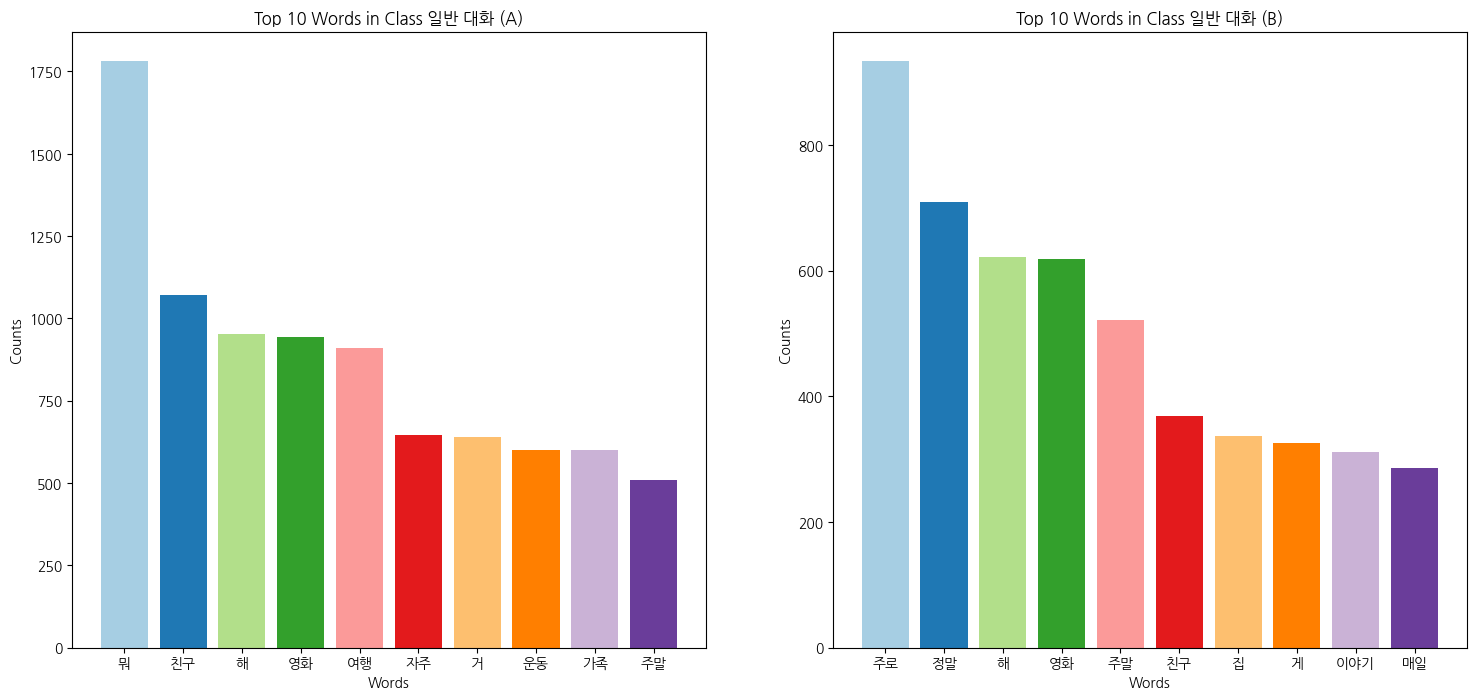

Class: 기타 괴롭힘 대화
A 데이터셋의 상위 10개 단어:
[('내', 461), ('말', 387), ('뭐', 348), ('거', 335), ('니', 312), ('진짜', 259), ('그냥', 200), ('애', 177), ('안', 159), ('새끼', 151)]

B 데이터셋의 상위 10개 단어:
[('내', 418), ('말', 385), ('뭐', 259), ('진짜', 220), ('거', 190), ('니', 141), ('안', 126), ('제발', 125), ('그냥', 120), ('지금', 120)]


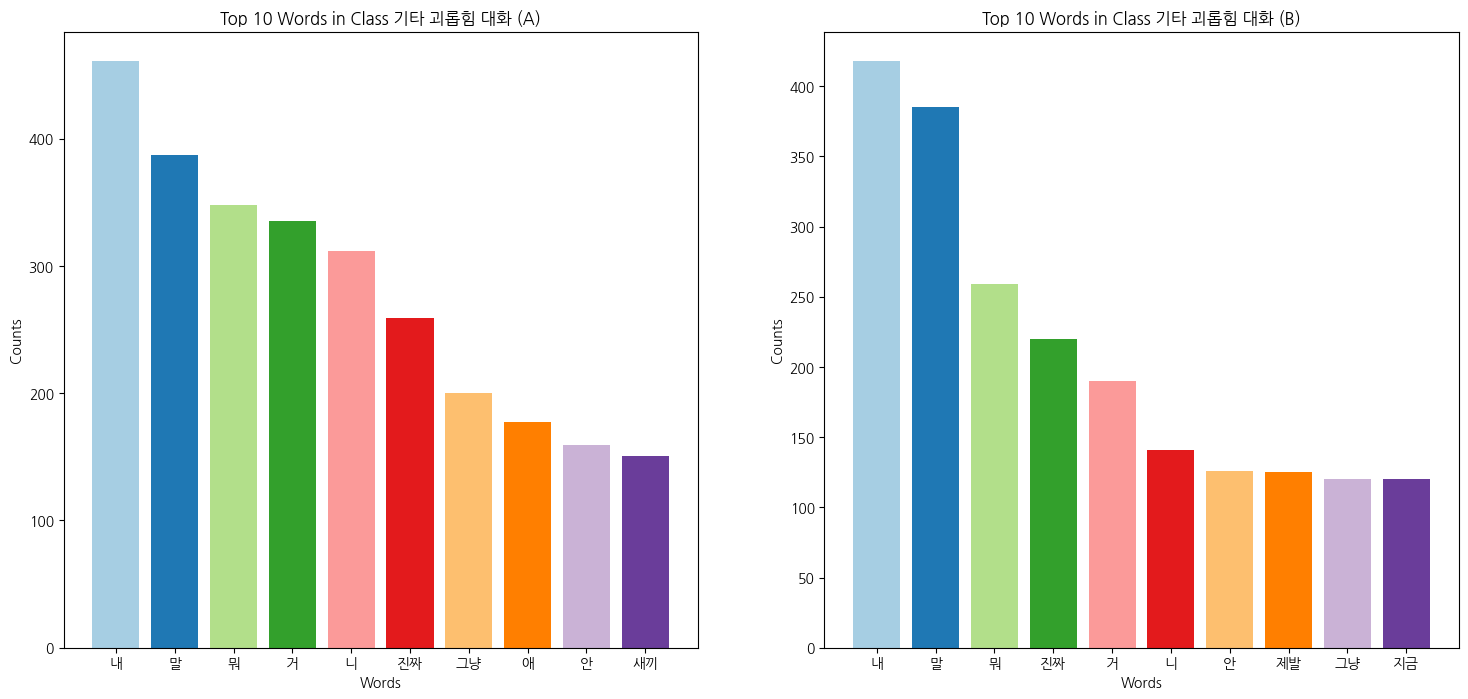

Class: 협박 대화
A 데이터셋의 상위 10개 단어:
[('내', 850), ('말', 462), ('니', 407), ('지금', 267), ('거', 238), ('진짜', 190), ('알', 190), ('사람', 180), ('안', 175), ('뭐', 166)]

B 데이터셋의 상위 10개 단어:
[('내', 461), ('제발', 354), ('말', 260), ('뭐', 178), ('니', 173), ('진짜', 154), ('거', 154), ('정말', 142), ('지금', 132), ('더', 128)]


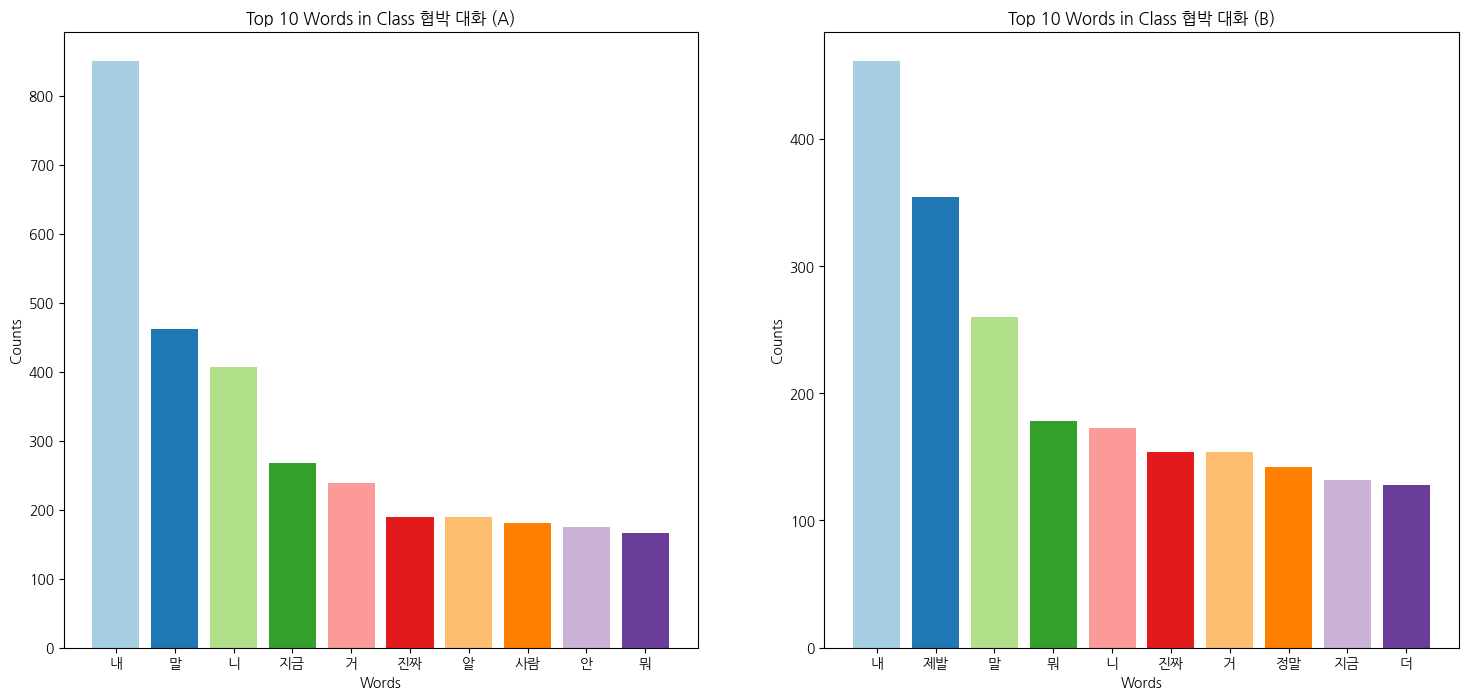

Class: 직장 내 괴롭힘 대화
A 데이터셋의 상위 10개 단어:
[('내', 571), ('말', 408), ('뭐', 367), ('거', 350), ('대리', 325), ('회사', 314), ('김', 239), ('오늘', 234), ('지금', 234), ('사람', 193)]

B 데이터셋의 상위 10개 단어:
[('부장', 203), ('말', 173), ('지금', 144), ('회사', 141), ('말씀', 141), ('거', 138), ('내', 136), ('대리', 132), ('과장', 125), ('뭐', 120)]


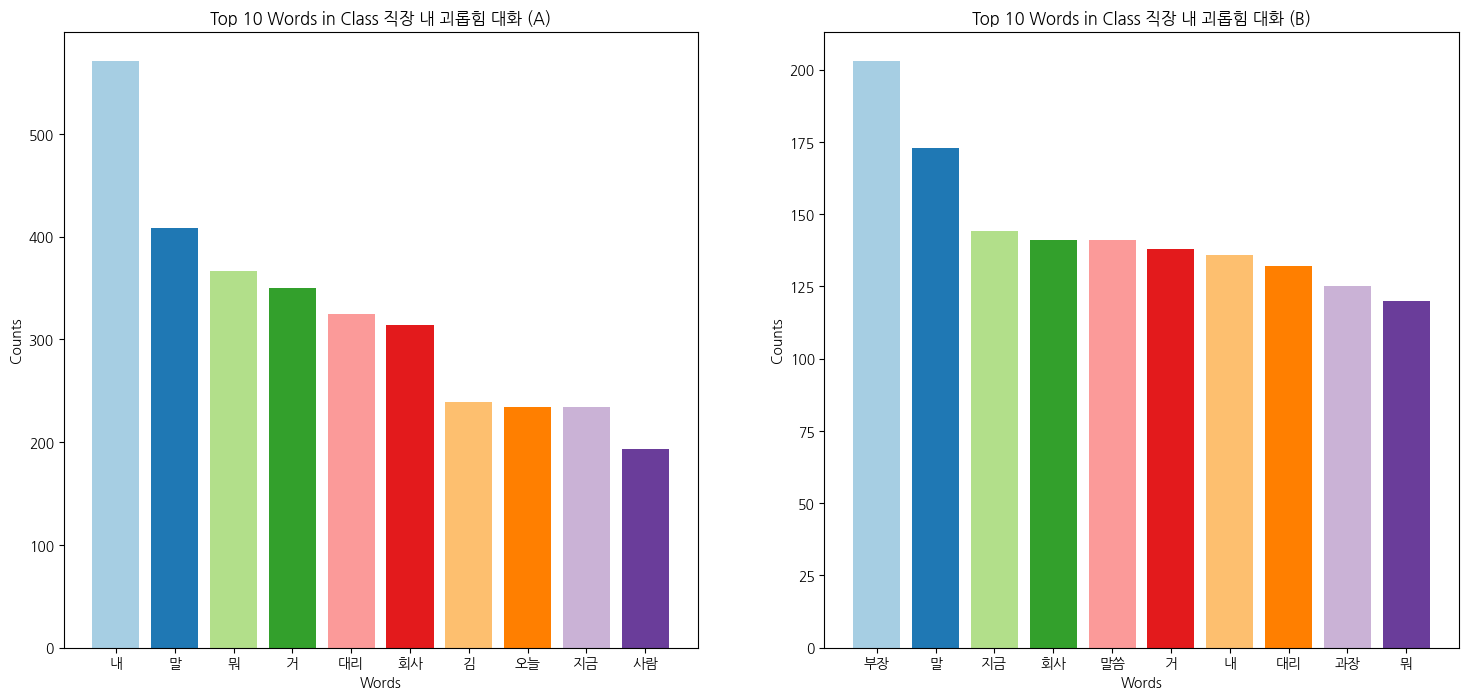

Class: 갈취 대화
A 데이터셋의 상위 10개 단어:
[('돈', 876), ('내', 684), ('거', 448), ('말', 314), ('니', 236), ('지금', 232), ('뭐', 228), ('그냥', 186), ('줄', 182), ('진짜', 180)]

B 데이터셋의 상위 10개 단어:
[('돈', 606), ('거', 292), ('진짜', 283), ('내', 278), ('제발', 197), ('말', 174), ('뭐', 129), ('정말', 128), ('안', 121), ('지금', 118)]


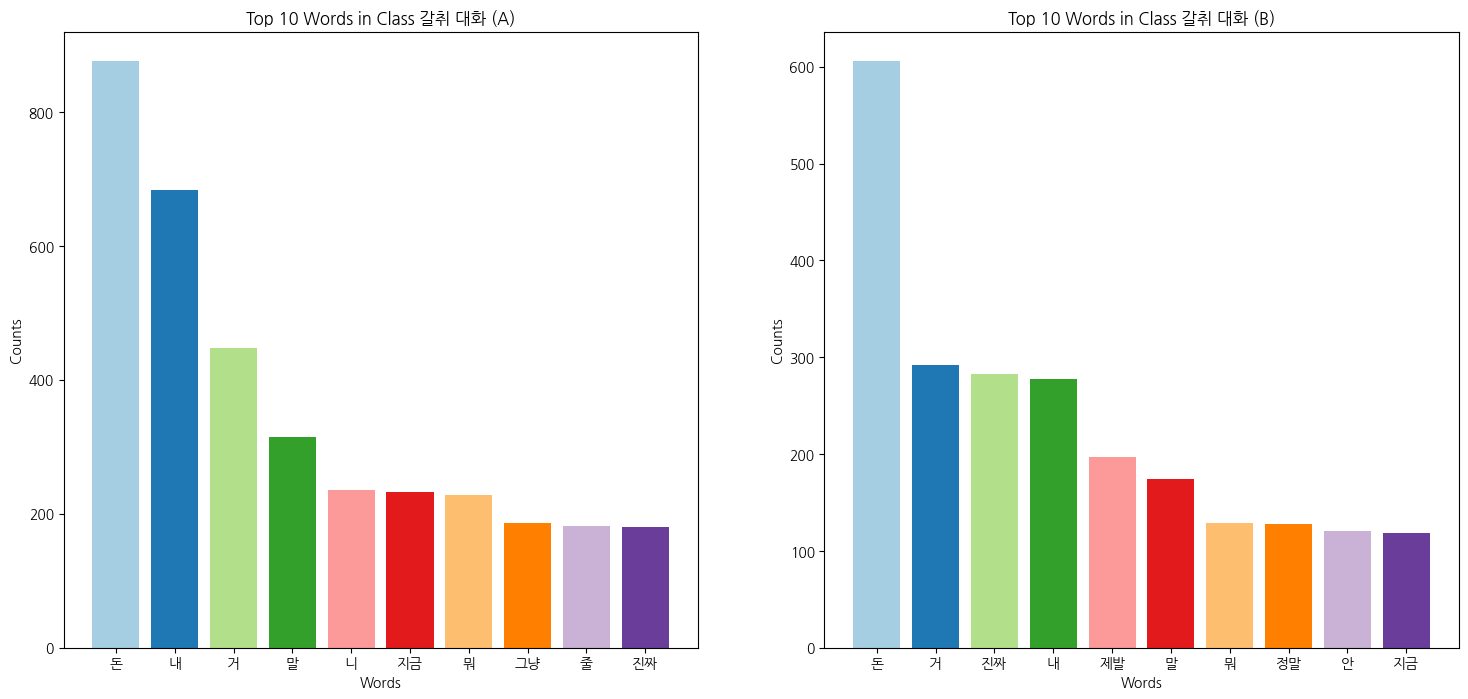

In [56]:
# 각 클래스별로 시각화
for class_name in classes:
    print(f"Class: {class_name}")
    print("A 데이터셋의 상위 10개 단어:")
    top_words_A = get_top_words(A_data, class_name)
    print(top_words_A)

    print("\nB 데이터셋의 상위 10개 단어:")
    top_words_B = get_top_words(B_data, class_name)
    print(top_words_B)

    plot_top_words(top_words_A, top_words_B, class_name)

## 전처리

### 기본 전처리

중복값 여부 찾아보기

In [24]:
# 중복값 찾기
duplicates = train_data[train_data.duplicated()]
duplicates

,idx,class,conversation


결측치 여부 확인하기

In [23]:
# 결측치 여부 확인하기
train_data.isnull().sum()

idx             0
class           0
conversation    0
dtype: int64

클래스 컬럼 인코딩하기

In [57]:
# 'class'를 'type'으로 매핑하는 딕셔너리 생성하기
class_to_type = {
    '협박 대화': 0,
    '갈취 대화': 1,
    '직장 내 괴롭힘 대화': 2,
    '기타 괴롭힘 대화': 3,
    '일반 대화': 4
}

In [58]:
# 'class' 열을 기반으로 새로운 'type' 열 추가하기
train_data['type'] = train_data['class'].map(class_to_type)

In [59]:
# type 열 추가했는지 확인하기
train_data.head()

,idx,class,conversation,type
0,0,일반 대화,"학교 점심 뭐 나와?\n주로 한식이 나와.\n학원 다녀?\n응, 영어 학원 다녀.\...",4
1,1,기타 괴롭힘 대화,어이 거기 뒤뚱거리는 놈 \n나?\n그래 너 여기 뒤뚱거리는 놈이 너밖에 더 있냐?...,3
2,2,협박 대화,너 그따위로 운전하면 확 갈아마셔버린다.\n 뭐라구?\n 나와 이 자식아. 미안하단...,0
3,3,직장 내 괴롭힘 대화,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,2
4,4,일반 대화,"비가 많이 오네.\n우산 가져왔어?\n날씨가 추워졌어.\n맞아, 이제 겨울이야.\n...",4


In [60]:
# 기존 idx 컬럼 삭제하기
new_train_data = train_data.drop('idx', axis=1)

In [61]:
# idx 컬럼 삭제했는지 확인하기
new_train_data.head()

,class,conversation,type
0,일반 대화,"학교 점심 뭐 나와?\n주로 한식이 나와.\n학원 다녀?\n응, 영어 학원 다녀.\...",4
1,기타 괴롭힘 대화,어이 거기 뒤뚱거리는 놈 \n나?\n그래 너 여기 뒤뚱거리는 놈이 너밖에 더 있냐?...,3
2,협박 대화,너 그따위로 운전하면 확 갈아마셔버린다.\n 뭐라구?\n 나와 이 자식아. 미안하단...,0
3,직장 내 괴롭힘 대화,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,2
4,일반 대화,"비가 많이 오네.\n우산 가져왔어?\n날씨가 추워졌어.\n맞아, 이제 겨울이야.\n...",4


In [ ]:
# new_train_data를 train_data에 덮어 씌우기
# train_data = new_train_data

### 기타 전처리

### 토큰화

## 전처리 후 분석

## 데이터 분할